# ***`House Price Prediction`***



> About This Project




In this house price prediction project, we employed the XGBoost regression model to predict house prices based on various features from the House Price Dataset. Here's a summary of the steps we followed and the key insights from the analysis:

1. **Data Preprocessing:**
   - Loaded the House Price Dataset and checked its dimensions.
   - Explored the dataset for missing values and statistical measures.
   - Visualized the correlations between features using a heatmap to understand feature relationships.

2. **Data Splitting:**
   - Split the dataset into training and testing sets using the `train_test_split` function.
   - Verified the shape of the training and testing sets.

3. **Model Training and Evaluation:**
   - Loaded the XGBoost regressor model.
   - Trained the model using the training data.
   - Evaluated the model's performance on the training set:
     - Calculated the R-squared error, which indicated that the model explained the variance in the training data very well.
     - Calculated the Mean Absolute Error, which quantified the average difference between actual and predicted prices.

4. **Visualization:**
   - Plotted a scatter plot of actual prices vs. predicted prices for both the training and testing sets. The visualizations showed how well the model's predictions aligned with the actual prices.

5. **Test Prediction and Evaluation:**
   - Made predictions on the test dataset using the trained model.
   - Evaluated the model's performance on the test set:
     - Calculated the R-squared error, which indicated the model's predictive power on unseen data.
     - Calculated the Mean Absolute Error, providing insight into the average prediction error.

6. **Conclusion:**
   - The XGBoost regression model demonstrated remarkable predictive capabilities for the Boston House Price Dataset.
   - The high R-squared value on both the training and test sets indicated that the model generalized well to unseen data.
   - The low Mean Absolute Error further confirmed the model's effectiveness in predicting house prices.

Overall, the results of the house price prediction project using XGBoost regression were promising. The model's strong performance on both training and testing datasets suggests that it can provide accurate predictions for house prices based on the given features. The scatter plots visualized the alignment between predicted and actual prices, highlighting the model's accuracy. However, it's important to keep in mind that further optimization, hyperparameter tuning, and potential feature engineering could be explored to enhance the model's performance even more.

# **Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# **Importing the Boston House Price Dataset**

In [15]:
house_price_dataframe = pd.read_csv('/content/HousingData.csv')

In [16]:
print(house_price_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8

In [17]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [18]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [19]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

In [20]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Understanding the correlation between various features in the dataset**

## **Positive Correlation**

## **Negative Correlation**

In [21]:
correlation = house_price_dataframe.corr()

<Axes: >

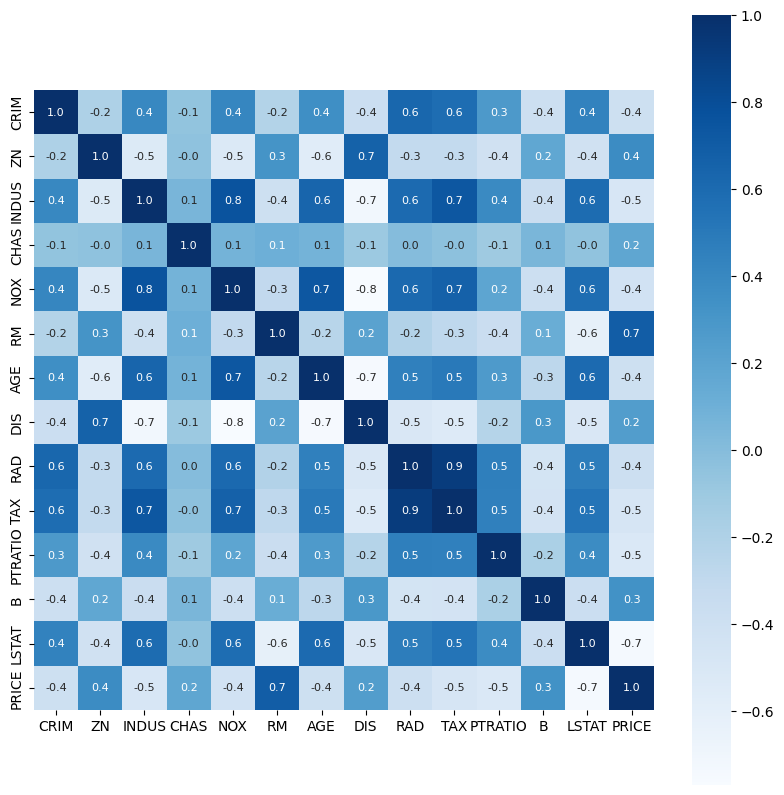

In [22]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# **Splitting the data & Target**

In [23]:
X = house_price_dataframe.drop(['PRICE'], axis=1)
Y = house_price_dataframe['PRICE']

In [24]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

# **Training Data & test**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# **Model Training**

In [27]:
# loading the model
model = XGBRegressor()

In [28]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# **Evaluation**

In [29]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [30]:
print(training_data_prediction)

[23.128431  20.994154  20.101261  34.67768   13.903945  13.489747
 21.99753   15.193501  10.899377  22.690107  13.813943   5.614215
 29.804506  49.987877  34.888184  20.615887  23.385252  19.219105
 32.693237  19.607283  26.987926   8.400735  46.006306  21.70009
 27.08245   19.38461   19.299566  24.807394  22.600876  31.715944
 18.551641   8.707558  17.408579  23.699173  13.299077  10.500352
 12.715582  25.006472  19.694242  14.893264  24.218592  24.984715
 14.913808  17.005949  15.597038  12.702356  24.503147  15.003218
 49.999443  17.526314  21.187368  32.001503  15.596226  22.899336
 19.307703  18.713356  23.291584  37.196495  30.100304  33.104607
 20.99445   49.98314   13.39885    4.9928923 16.48852    8.403917
 28.697334  19.492647  20.58597   45.39965   39.802162  33.39493
 19.806774  33.40387   25.294323  49.999493  12.515287  17.44132
 18.611597  22.601511  50.002136  23.804588  23.334707  23.10605
 41.709064  16.125729  31.617798  36.096508   6.997423  20.380814
 19.996199  12

In [31]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999970506674762
Mean Absolute Error :  0.011185854968458139


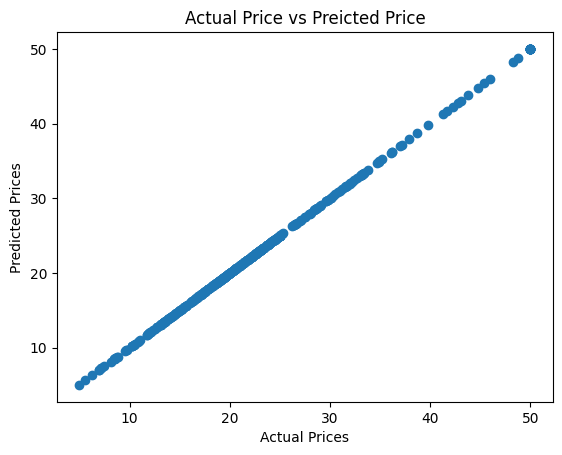

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Test Predection**

In [32]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [33]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8361097215940602
Mean Absolute Error :  2.466887313244389


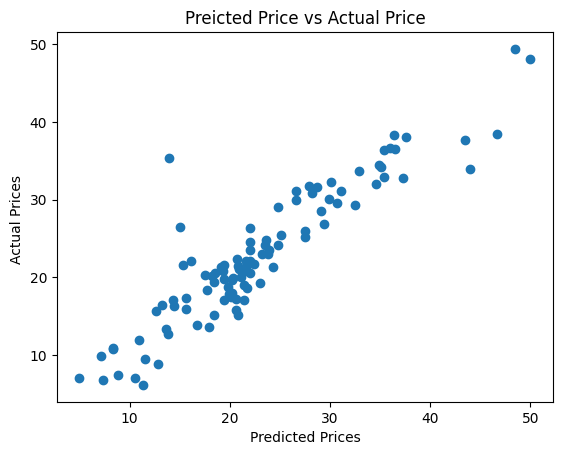

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices ")
plt.title("Preicted Price vs Actual Price")
plt.show()